# Calculate and Plot Phasors on Synthetic Data

In this notebook, we make some synthetic data by creating exponential curves with different decays and pulsed laser frequencies. We then build the phasor plots for these "single-pixel images" and compare their position in the plot against the theoretical position.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from FLIM_phasor import *

## Generating Synthetic FLIM data

Input options:

In [2]:
laser_frequency = 60 # MHz
amplitude = 1
tau = 1 # ns
number_of_harmonics = 5
number_of_time_points = 270

### Creating time array

In [3]:
time_array = create_time_array(laser_frequency, number_of_time_points)
time_array

array([ 0.        ,  0.0617284 ,  0.12345679,  0.18518519,  0.24691358,
        0.30864198,  0.37037037,  0.43209877,  0.49382716,  0.55555556,
        0.61728395,  0.67901235,  0.74074074,  0.80246914,  0.86419753,
        0.92592593,  0.98765432,  1.04938272,  1.11111111,  1.17283951,
        1.2345679 ,  1.2962963 ,  1.35802469,  1.41975309,  1.48148148,
        1.54320988,  1.60493827,  1.66666667,  1.72839506,  1.79012346,
        1.85185185,  1.91358025,  1.97530864,  2.03703704,  2.09876543,
        2.16049383,  2.22222222,  2.28395062,  2.34567901,  2.40740741,
        2.4691358 ,  2.5308642 ,  2.59259259,  2.65432099,  2.71604938,
        2.77777778,  2.83950617,  2.90123457,  2.96296296,  3.02469136,
        3.08641975,  3.14814815,  3.20987654,  3.27160494,  3.33333333,
        3.39506173,  3.45679012,  3.51851852,  3.58024691,  3.64197531,
        3.7037037 ,  3.7654321 ,  3.82716049,  3.88888889,  3.95061728,
        4.01234568,  4.07407407,  4.13580247,  4.19753086,  4.25

### Plotting an Exponential Function
Here we plot a mono-exponential function with a given initial amplitude and decay or [time constant (tau)](https://en.wikipedia.org/wiki/Time_constant)

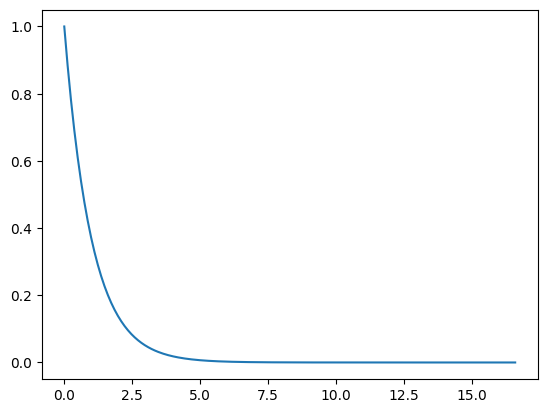

In [4]:
plt.plot(time_array, monoexp(time_array, amplitude, tau))

### Generating a Synthetic FLIM Image
We can create a synthetic linear FLIM image where each pixel will contain an exponential curve given by a specific amplitude and a decay. The amplitudes and decays can be given as a list of values. In the example below, we use a single value, therefore, we produce a "single-pixel image".

In [5]:
flim_data = make_synthetic_flim_data(time_array, amplitude, tau)

In [6]:
flim_data.shape

(270, 1, 1)

## Displaying the Phasor Plot for Different Harmonics

Below we plot up to 5 harmonics for a single tau and the theoretical position as a line.

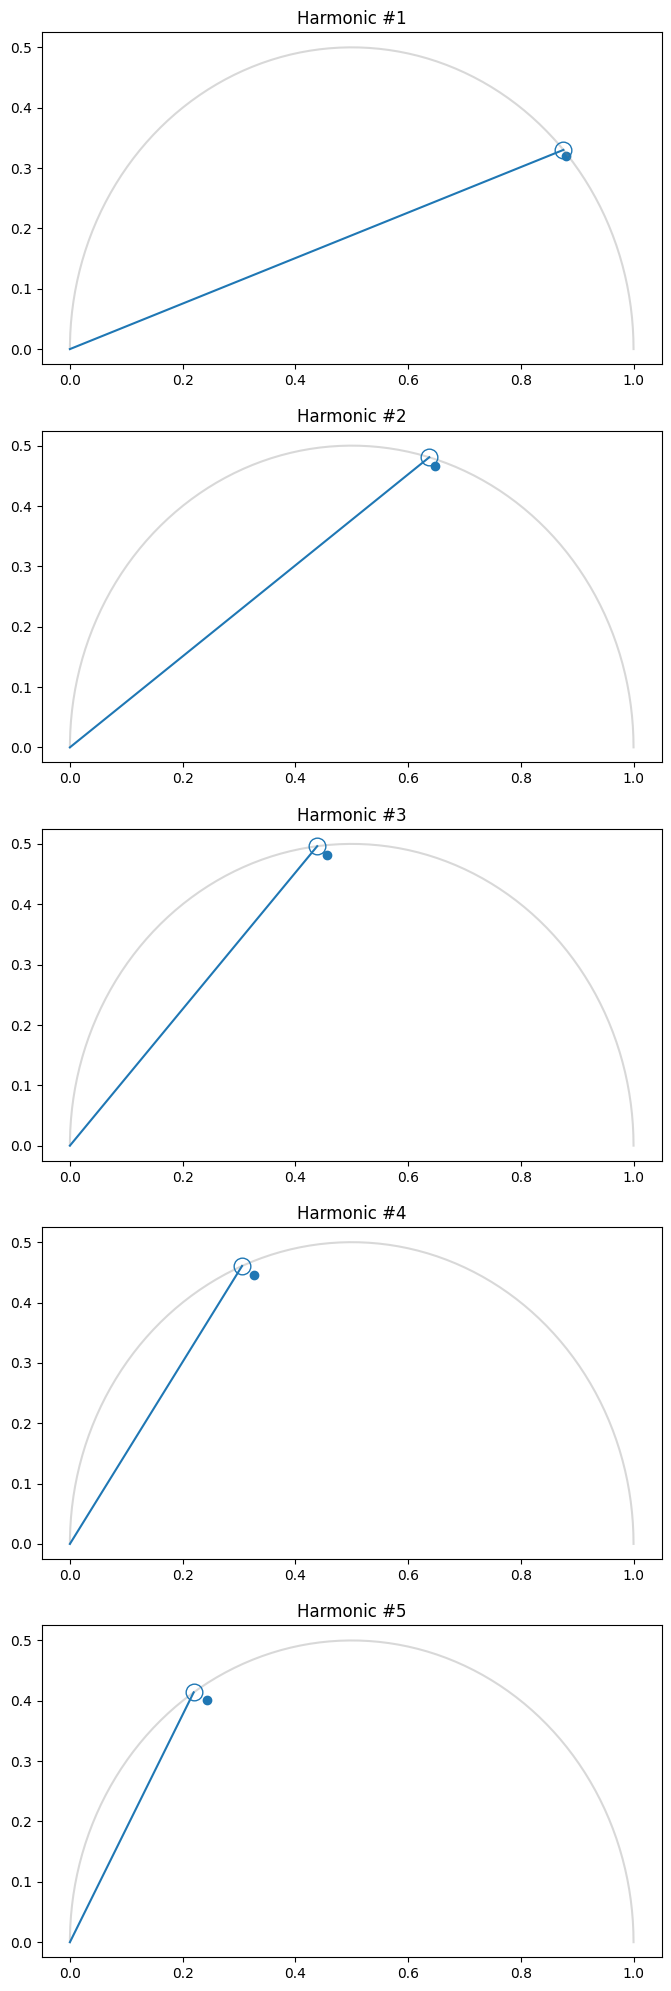

In [7]:
fig, ax = plt.subplots(number_of_harmonics, 1, figsize=(8, number_of_harmonics*5))
for i in range(number_of_harmonics):
    g, s, dc = get_phasor_components(flim_data, harmonic = i+1)
    x = np.ravel(g)
    y = np.ravel(s)
    add_phasor_circle(ax[i])
    ax[i].scatter(x, y)
    title = 'Harmonic #' + str(i+1)
    ax[i].set_title(title)
    add_tau_lines(ax[i], tau, (i+1)*laser_frequency)

There is a certain mismatch due to the sampling frequency. We can artificially increase the sampling frequency by increasing the number of time points. This way, the mismatch decreases.

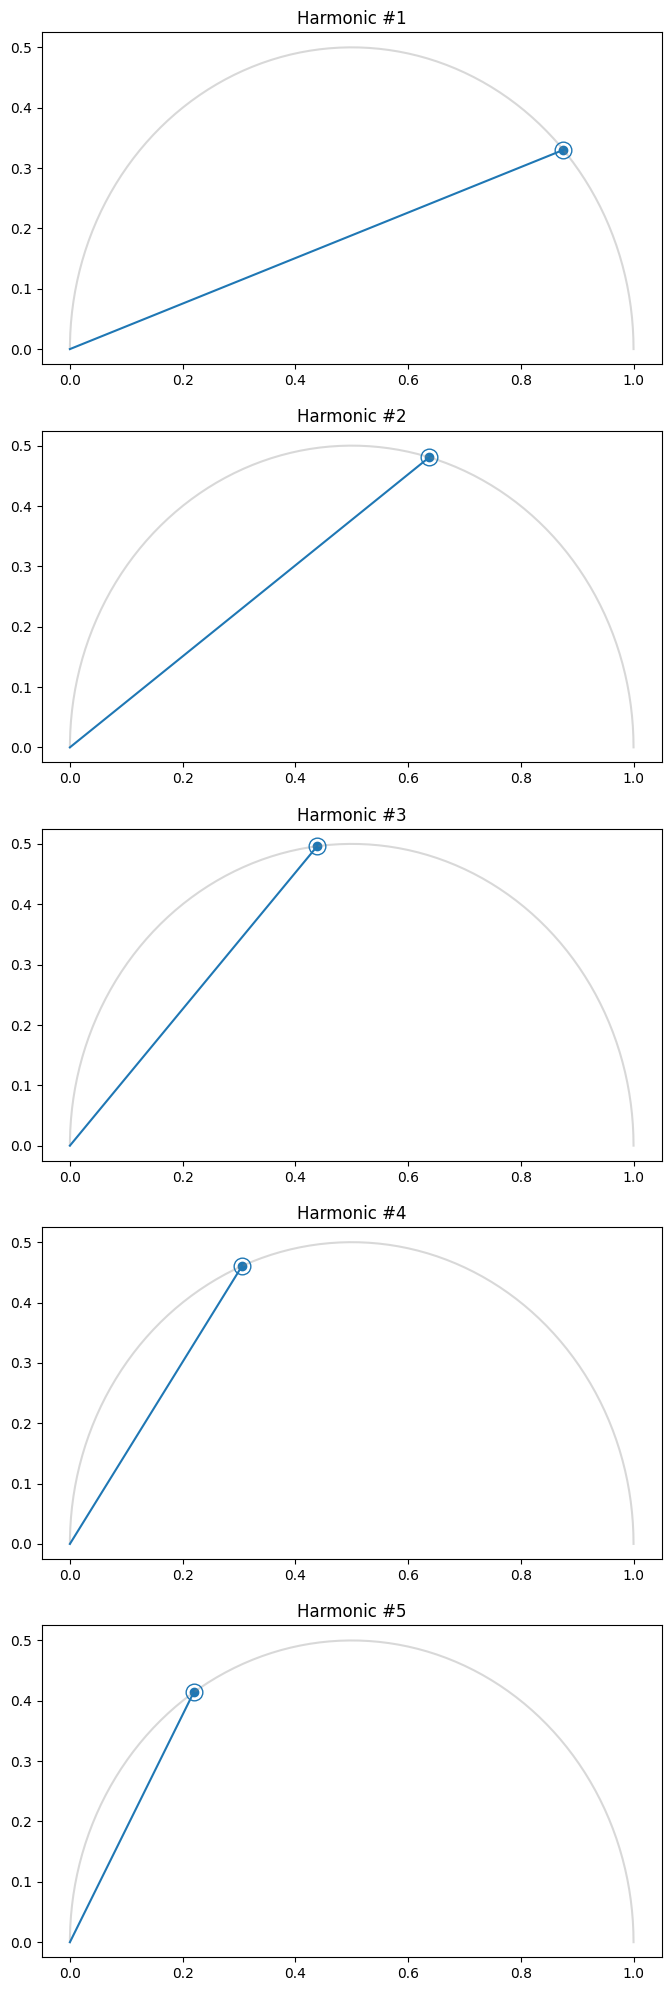

In [8]:
number_of_time_points = 27000
time_array = create_time_array(laser_frequency, number_of_time_points)

flim_data = make_synthetic_flim_data(time_array, amplitude, tau)

fig, ax = plt.subplots(number_of_harmonics, 1, figsize=(8, number_of_harmonics*5))
for i in range(number_of_harmonics):
    g, s, dc = get_phasor_components(flim_data, harmonic = i+1)
    x = np.ravel(g)
    y = np.ravel(s)
    add_phasor_circle(ax[i])
    ax[i].scatter(x, y)
    title = 'Harmonic #' + str(i+1)
    ax[i].set_title(title)
    add_tau_lines(ax[i], tau, (i+1)*laser_frequency)

## Displaying Time Plots and Phasor Plots for Different Decays and Laser Frequencies

Below we plot the first harmonics for a list of different tau and a list of different frequencies. Each tau is displayed with a different color, and each frequency is displayed in a different plot.

In [11]:
number_of_harmonics = 1
amplitude = 1
tau_list = [0.1, 0.2, 0.5, 1, 2, 5, 10, 25, 40] # ns
frequency_list = [40, 60, 80] # MHz
number_of_time_points = 270

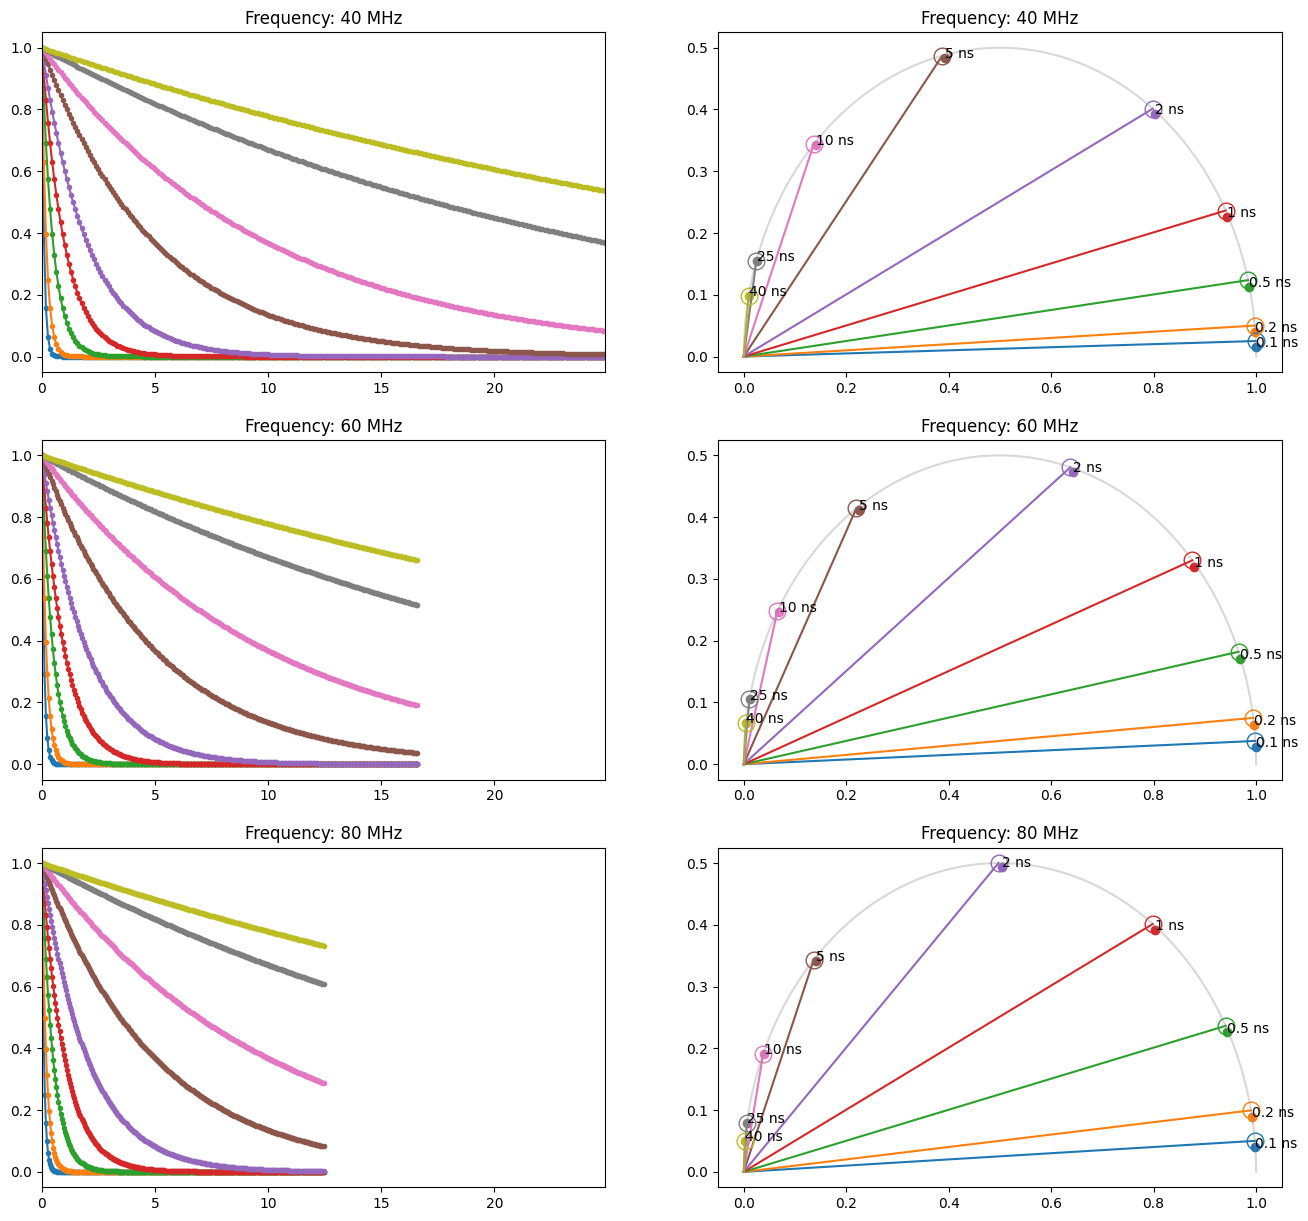

In [13]:
fig, ax = plt.subplots(len(frequency_list), 2, figsize=(16, len(frequency_list)*5))
max_time = []
for i, frequency in enumerate(frequency_list):
    time_array = create_time_array(frequency, number_of_time_points)
    max_time.append(max(time_array))
    for tau in tau_list:
        # Plot time domain
        line, = ax[i,0].plot(time_array, monoexp(time_array, amplitude, tau))
        ax[i,0].plot(time_array, monoexp(time_array, amplitude, tau), '.', color = line.get_color())
        
        # Phasor plot
        flim_data = make_synthetic_flim_data(time_array, amplitude, tau)
        g, s, dc = get_phasor_components(flim_data, harmonic = 1)
        x = np.ravel(g)
        y = np.ravel(s)
        ax[i,1].scatter(x, y)
        text = str(tau) + ' ns'
        ax[i,1].text(x, y, text)
        add_tau_lines(ax[i,1], tau, frequency)
    add_phasor_circle(ax[i,1])
    
    title = 'Frequency: ' + str(frequency) + ' MHz'
    ax[i,0].set_title(title)
    ax[i,0].set_xlim(0, max(max_time))
    ax[i,1].set_title(title)